In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tkinter as tk
from sklearn.model_selection import train_test_split #,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


from xgboost import XGBRegressor
from sklearn import metrics

%matplotlib inline
from matplotlib.ticker import ScalarFormatter  # Add this line for ScalarFormatter



In [23]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [24]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [25]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [26]:
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [27]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [28]:
exercise_df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [29]:
print("This dataset has " , exercise_df.shape[0] ," instances and ",  exercise_df.shape[1] , " columns.")

This dataset has  15000  instances and  9  columns.


C:\Users\HP\AppData\Local\Temp\ipykernel_23660\1463696565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Age'],kde=False)


<Axes: xlabel='Age'>

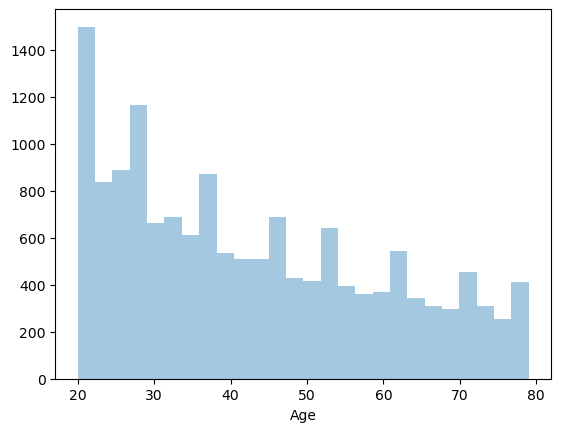

In [30]:
sns.distplot(exercise_df['Age'],kde=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\3088043998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Height'],kde=False,bins=30)


<Axes: xlabel='Height'>

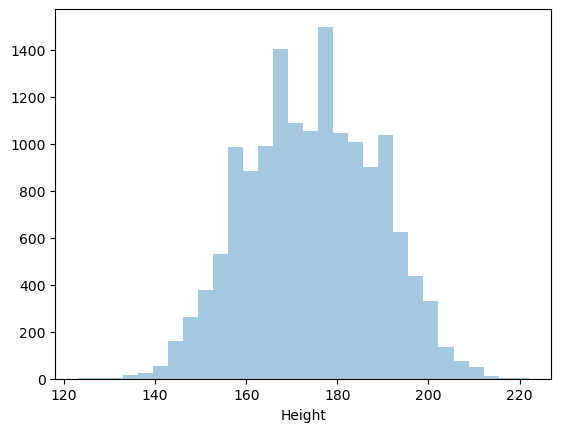

In [31]:
sns.distplot(exercise_df['Height'],kde=False,bins=30)

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\1846068146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Weight'],kde=False,bins=30)


<Axes: xlabel='Weight'>

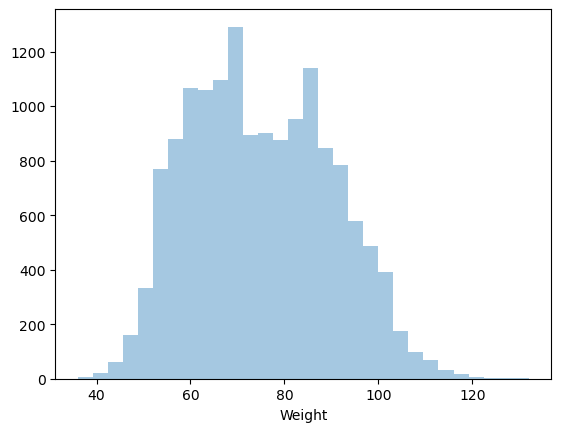

In [32]:
sns.distplot(exercise_df['Weight'],kde=False,bins=30)

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\2097736358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Duration'],kde=False)


<Axes: xlabel='Duration'>

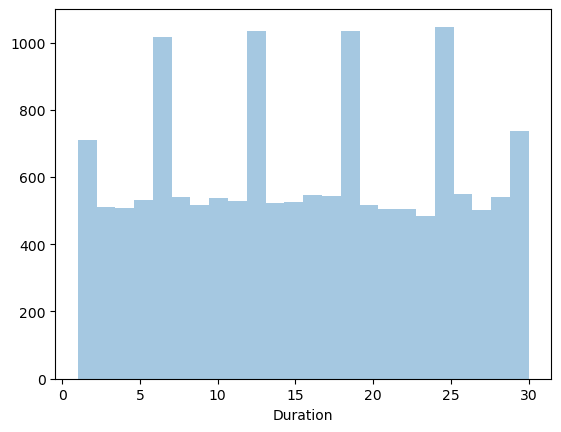

In [33]:
sns.distplot(exercise_df['Duration'],kde=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\1485407414.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Heart_Rate'],kde=False)


<Axes: xlabel='Heart_Rate'>

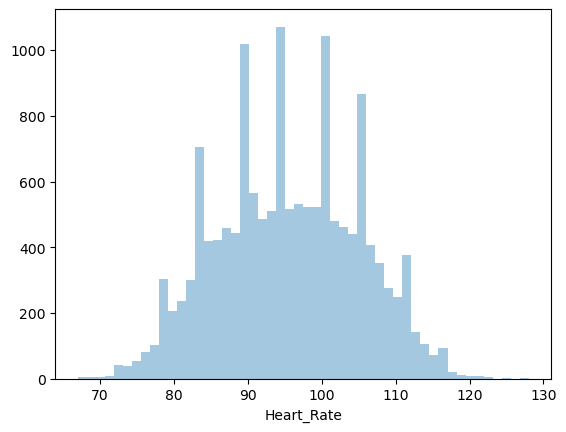

In [34]:
sns.distplot(exercise_df['Heart_Rate'],kde=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\3560510534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Body_Temp'],kde=False,bins=30)


<Axes: xlabel='Body_Temp'>

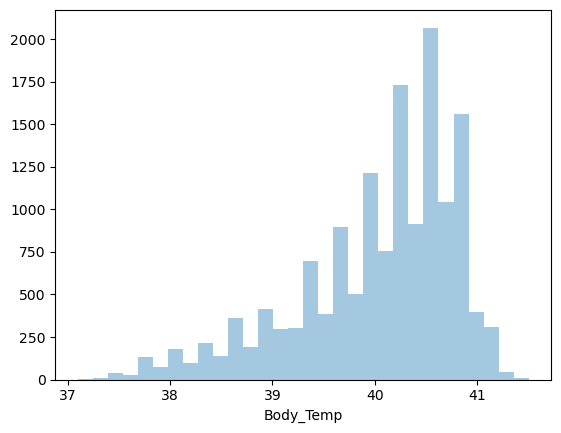

In [35]:
sns.distplot(exercise_df['Body_Temp'],kde=False,bins=30)

C:\Users\HP\AppData\Local\Temp\ipykernel_23660\1043303358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df['Calories'],kde=False)


<Axes: xlabel='Calories'>

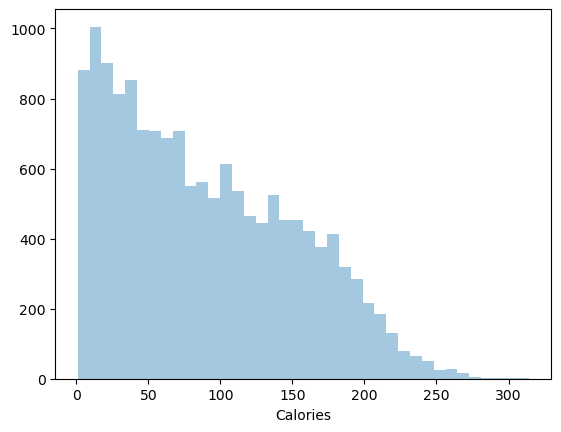

In [36]:
sns.distplot(exercise_df['Calories'],kde=False)

<Axes: xlabel='Gender', ylabel='count'>

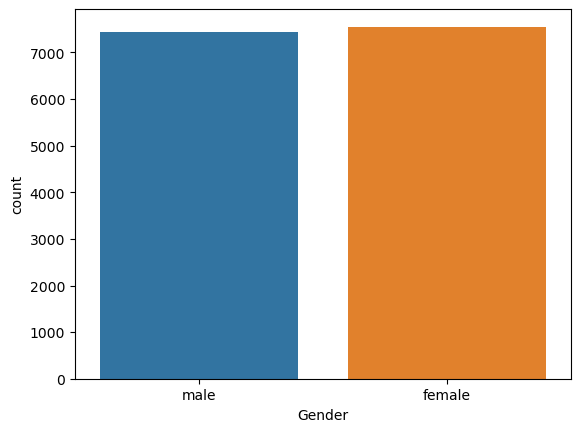

In [37]:
sns.countplot(x='Gender', data=exercise_df)

<Axes: xlabel='Gender', ylabel='Height'>

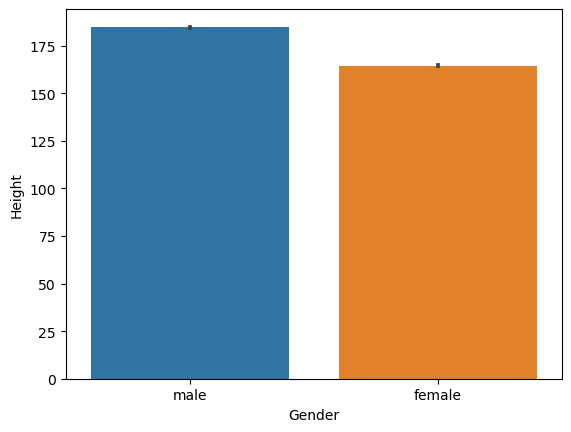

In [38]:
sns.barplot(x='Gender', y='Height', data=exercise_df)

<Axes: xlabel='Gender', ylabel='Calories'>

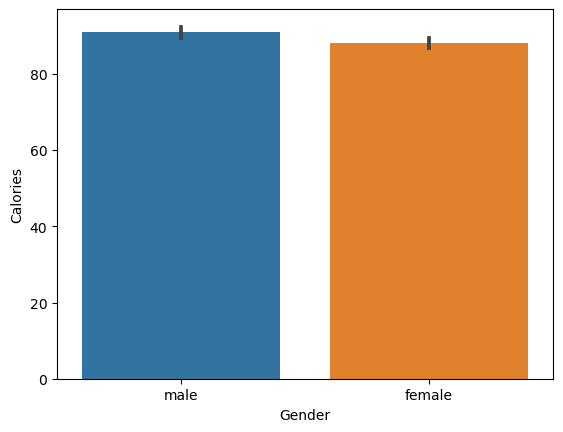

In [39]:
sns.barplot(x='Gender', y='Calories', data=exercise_df)

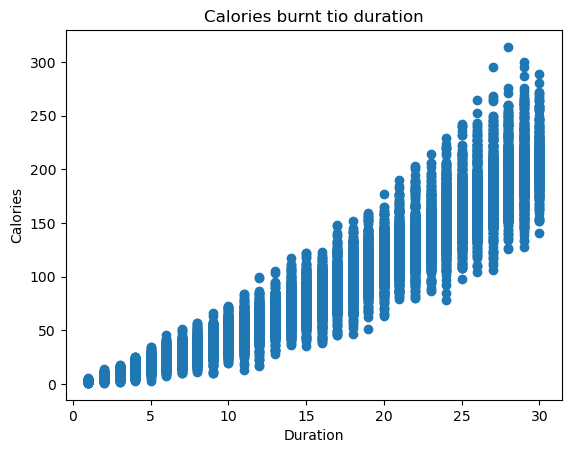

In [40]:
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Calories burnt tio duration")
plt.scatter(exercise_df['Duration'],exercise_df['Calories'])

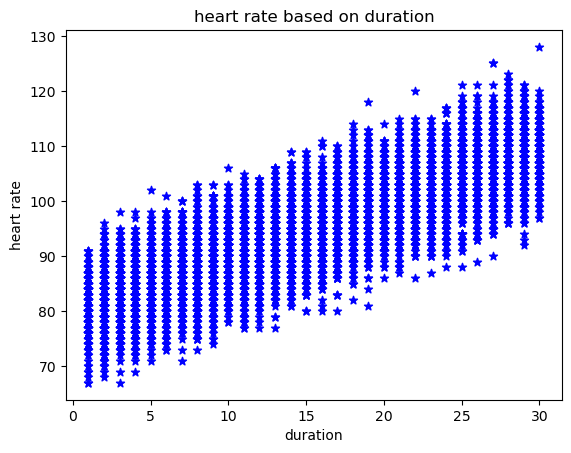

In [41]:
plt.scatter(exercise_df["Duration"],exercise_df["Heart_Rate"], color = 'blue' , marker='*')
plt.xlabel('duration')
plt.ylabel('heart rate')
plt.title('heart rate based on duration')
plt.show()

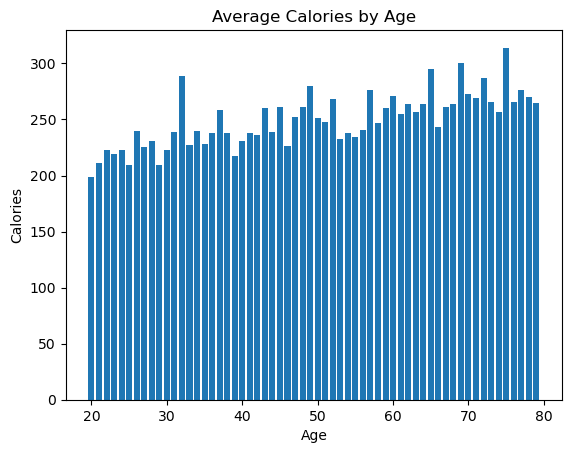

In [42]:
# Create a bar plot using matplotlib
plt.bar(exercise_df["Age"], exercise_df["Calories"])

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Calories')

# Set the title of the plot
plt.title('Average Calories by Age')

# Display the plot
plt.show()


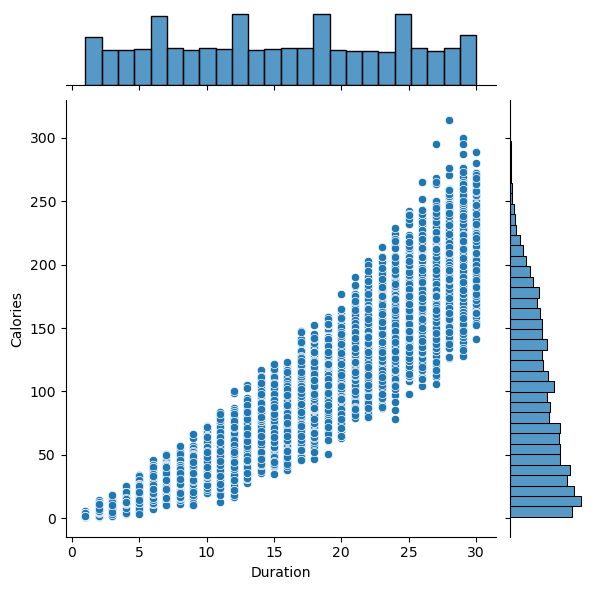

In [43]:
# Create a joint plot using Seaborn
sns.jointplot(x='Duration', y='Calories', data=exercise_df, kind='scatter')

# x='Duration': Set the variable for the x-axis
# y='Calories': Set the variable for the y-axis
# data=exercise_df: Use the DataFrame named exercise_df for plotting
# kind='scatter': Specify the type of joint plot as a scatter plot

# The joint plot includes a scatter plot in the center and marginal histograms on the top and right.
# It provides insights into the relationship between 'Duration' and 'Calories'.


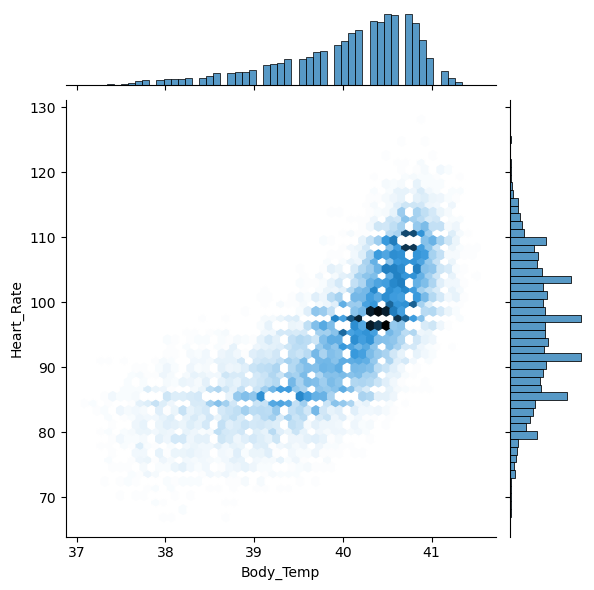

In [44]:
# Create a joint plot using Seaborn
sns.jointplot(x='Body_Temp', y='Heart_Rate', data=exercise_df, kind='hex')

# x='Body_Temp': Set the variable for the x-axis to 'Body_Temp'
# y='Heart_Rate': Set the variable for the y-axis to 'Heart_Rate'
# data=exercise_df: Use the DataFrame named exercise_df for plotting
# kind='hex': Specify the type of joint plot as a hexbin plot

# The joint plot includes a hexbin plot in the center, providing a 2D representation of the distribution of points.
# Hexbin plots are useful for visualizing the density of points in a scatter plot.
# It allows you to see where points are concentrated, with darker areas indicating higher point density.


C:\Users\HP\AppData\Local\Temp\ipykernel_23660\3217786028.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1) #i is index  2 row 3 coloun
C:\Users\HP\AppData\Local\Temp\ipykernel_23660\3217786028.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(exercise_df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_23660\3217786028.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

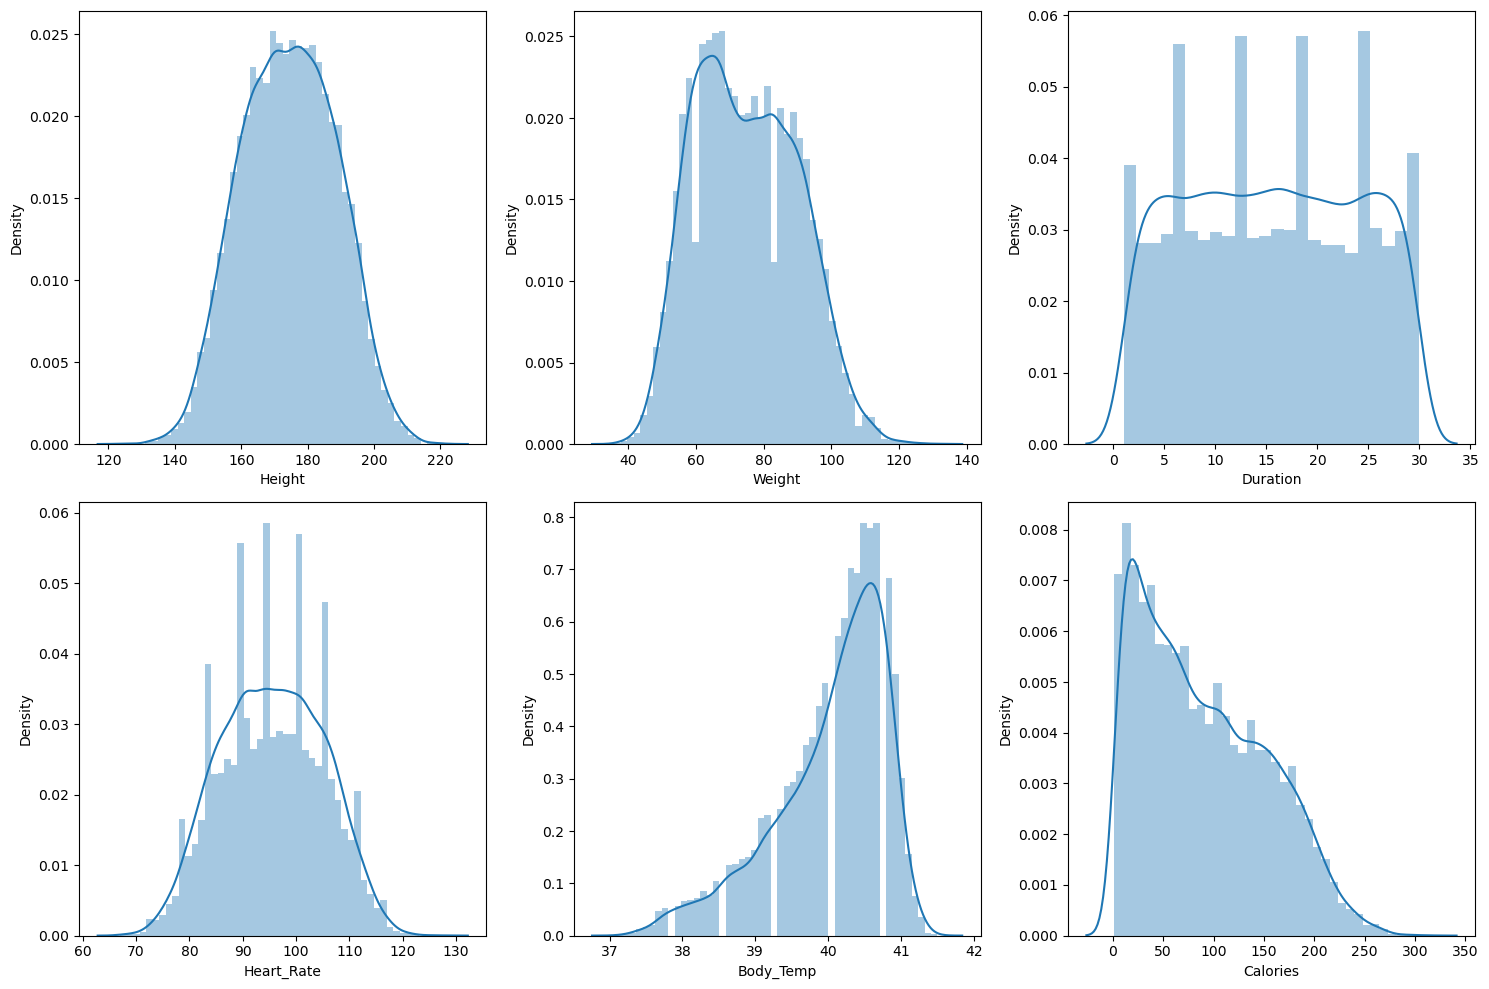

In [45]:
# Select numeric (float) columns as features
features = exercise_df.select_dtypes(include='float').columns

# Create subplots with a 2x3 grid layout, each subplot representing a histogram for a different feature
plt.subplots(figsize=(15, 10))

# Enumerate over the selected features
for i, col in enumerate(features):
    # Create a subplot at position i + 1 in the 2x3 grid
    plt.subplot(2, 3, i + 1) #i is index  2 row 3 coloun
    
    # Create a histogram using Seaborn's distplot for the selected feature
    sns.distplot(exercise_df[col])
    
# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


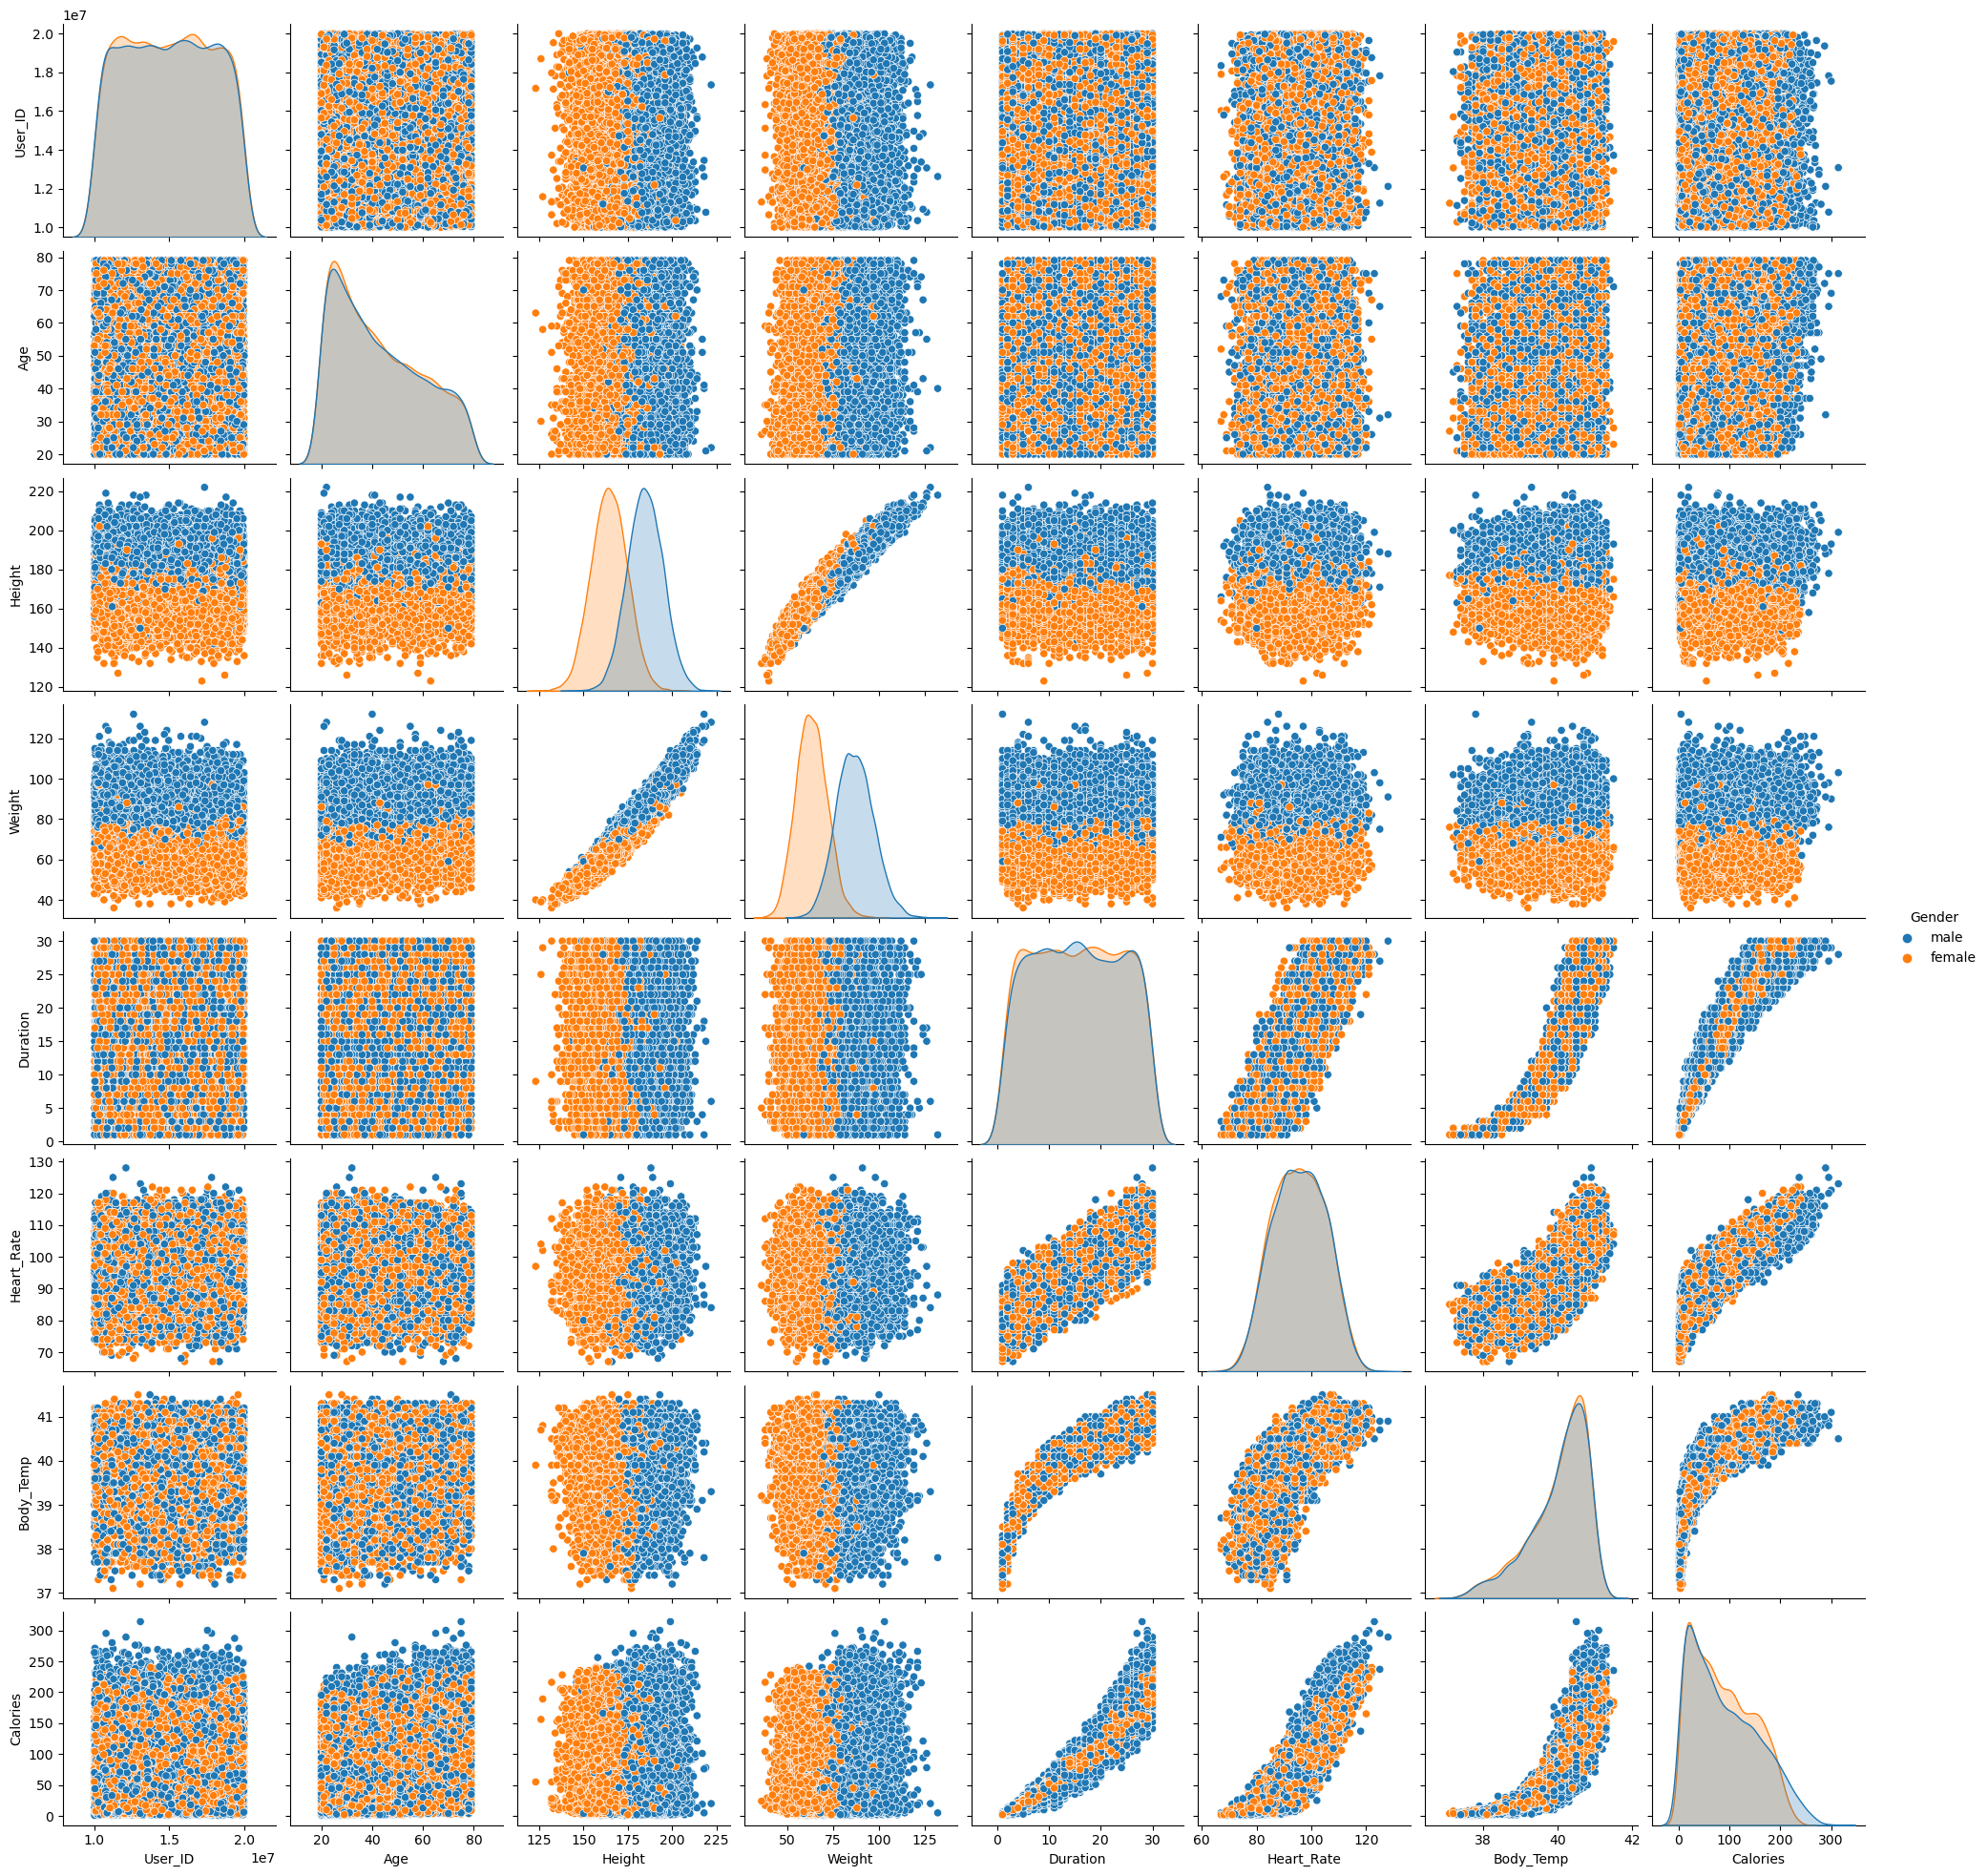

In [46]:
sns.pairplot(exercise_df , hue = "Gender")

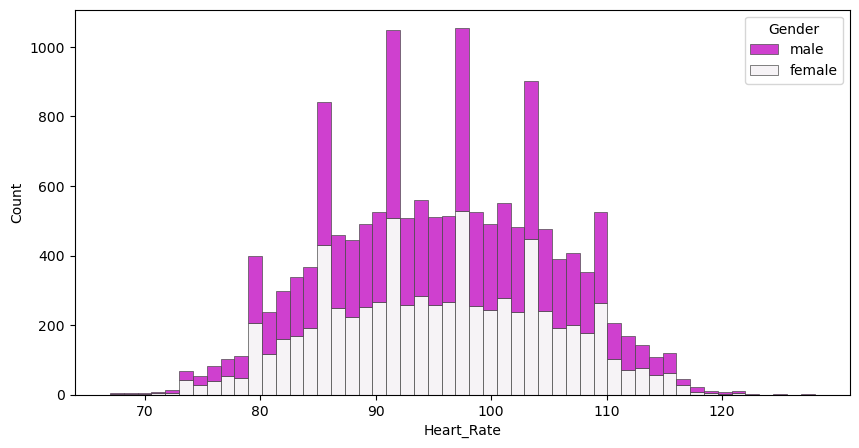

In [47]:


# Create a figure and axis using matplotlib
f, ax = plt.subplots(figsize=(10, 5))

# Create a histogram plot using Seaborn
sns.histplot(
    data=exercise_df,     # Use the DataFrame named exercise_df
    x="Heart_Rate",       # Set the variable for the x-axis
    hue="Gender",         # Set the variable for color differentiation
    multiple="stack",     # Stack the bars for different categories
    palette="light:m_r",  # Set the color palette
    edgecolor=".3",       # Set the edge color for bars
    linewidth=.5,         # Set the linewidth for bars
)

# Adjust the x-ticks based on your dataset
ax.set_xticks([70, 80, 90, 100, 110, 120])

# Show the plot
plt.show()


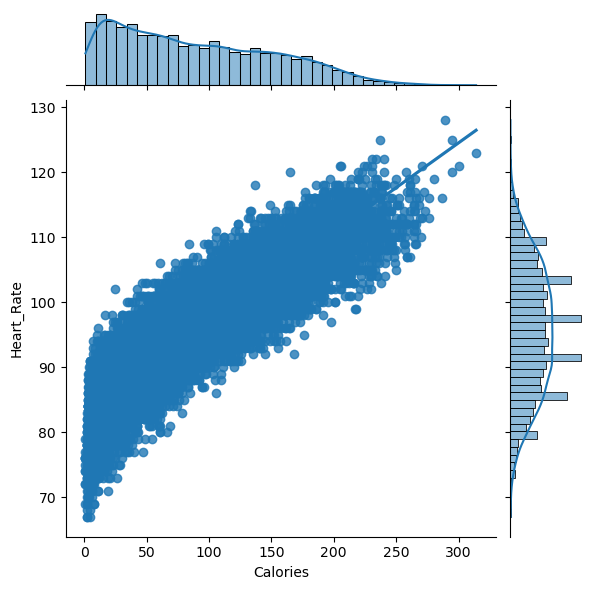

In [48]:
# Create a joint plot using Seaborn
sns.jointplot(x='Calories', y='Heart_Rate', data=exercise_df, kind='reg')

# x='Calories': Set the variable for the x-axis to 'Calories'
# y='Heart_Rate': Set the variable for the y-axis to 'Heart_Rate'
# data=exercise_df: Use the DataFrame named exercise_df for plotting
# kind='reg': Specify the type of joint plot as a scatter plot with regression lines

# The joint plot includes a scatter plot in the center, showing the relationship between 'Calories' and 'Heart_Rate'.



C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


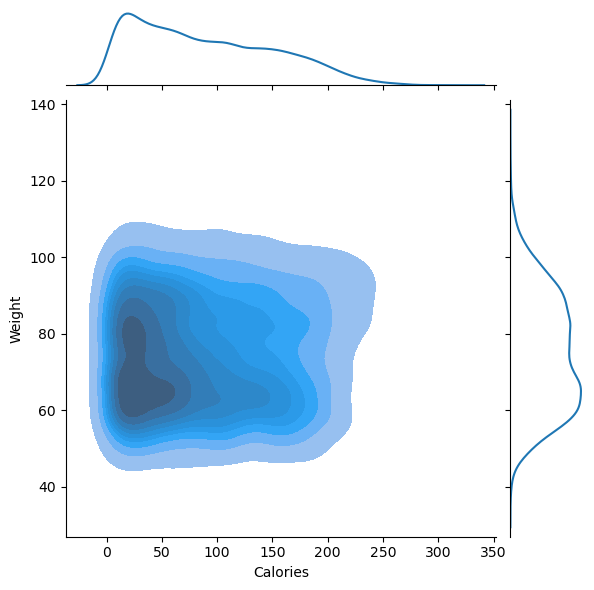

In [49]:
sns.jointplot(x='Calories', y='Weight', data=exercise_df,kind='kde',shade=True)

In [50]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)
     

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In [51]:
exercise_df.drop(columns = "User_ID" , inplace = True)

In [52]:
mylist = []
for i in exercise_df.Gender:
    if i == "male":
        mylist.append(0)
    elif i == "female":
        mylist.append(1)
exercise_df["Gender_index"] = mylist

In [53]:
exercise_df.drop("Gender",inplace=True, axis= 1)

In [54]:
exercise_df

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
0       68   190.0    94.0      29.0       105.0       40.8     231.0   
1       20   166.0    60.0      14.0        94.0       40.3      66.0   
2       69   179.0    79.0       5.0        88.0       38.7      26.0   
3       34   179.0    71.0      13.0       100.0       40.5      71.0   
4       27   154.0    58.0      10.0        81.0       39.8      35.0   
...    ...     ...     ...       ...         ...        ...       ...   
14995   20   193.0    86.0      11.0        92.0       40.4      45.0   
14996   27   165.0    65.0       6.0        85.0       39.2      23.0   
14997   43   159.0    58.0      16.0        90.0       40.1      75.0   
14998   78   193.0    97.0       2.0        84.0       38.3      11.0   
14999   63   173.0    79.0      18.0        92.0       40.5      98.0   

       Gender_index  
0                 0  
1                 1  
2                 0  
3                 1  
4                 1  
...             ...  
14995             1  
14996             1  
14997             1  
14998             0  
14999             0  

[15000 rows x 8 columns]

In [55]:
x=exercise_df.drop('Calories',axis='columns')
x

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_index
0       68   190.0    94.0      29.0       105.0       40.8             0
1       20   166.0    60.0      14.0        94.0       40.3             1
2       69   179.0    79.0       5.0        88.0       38.7             0
3       34   179.0    71.0      13.0       100.0       40.5             1
4       27   154.0    58.0      10.0        81.0       39.8             1
...    ...     ...     ...       ...         ...        ...           ...
14995   20   193.0    86.0      11.0        92.0       40.4             1
14996   27   165.0    65.0       6.0        85.0       39.2             1
14997   43   159.0    58.0      16.0        90.0       40.1             1
14998   78   193.0    97.0       2.0        84.0       38.3             0
14999   63   173.0    79.0      18.0        92.0       40.5             0

[15000 rows x 7 columns]

In [56]:
y=exercise_df.Calories
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

<Axes: >

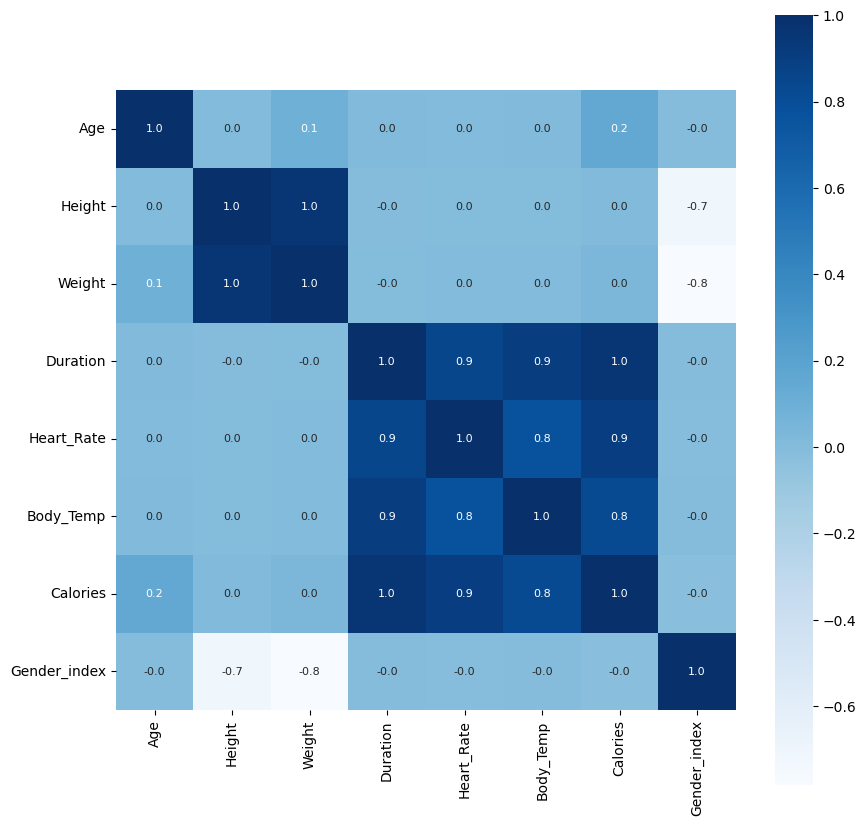

In [57]:
correlation = exercise_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [59]:
x_train

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_index
1154    38   169.0    67.0       3.0        85.0       38.5             1
9804    30   194.0    96.0       9.0        91.0       39.6             0
7919    78   182.0    79.0       7.0        84.0       39.4             1
4854    50   171.0    77.0      29.0       111.0       40.8             0
5947    32   172.0    66.0      29.0       105.0       40.8             1
...    ...     ...     ...       ...         ...        ...           ...
11798   49   178.0    71.0      12.0        98.0       39.9             1
13896   67   159.0    58.0      23.0       101.0       40.4             1
6637    25   167.0    64.0      20.0       100.0       40.4             1
2575    36   167.0    64.0      28.0       108.0       40.8             1
7336    30   187.0    88.0      10.0        94.0       40.2             0

[12000 rows x 7 columns]

In [60]:
x_test

Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_index
7592    41   172.0    74.0      24.0        98.0       40.8             1
3551    70   189.0    96.0      24.0       113.0       40.9             0
9698    53   173.0    68.0       7.0        96.0       39.3             1
3759    36   191.0    96.0       2.0        82.0       38.4             0
2353    46   169.0    68.0      20.0       111.0       40.6             1
...    ...     ...     ...       ...         ...        ...           ...
8859    20   161.0    60.0      29.0       107.0       40.3             1
2886    40   152.0    49.0      11.0        87.0       39.8             1
14357   57   160.0    62.0      23.0       103.0       40.2             1
9430    58   171.0    67.0       6.0        82.0       39.4             1
11870   62   175.0    70.0      17.0        94.0       40.3             1

[3000 rows x 7 columns]

In [61]:
model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.2,  # Rate at which the model learns
    max_depth=15,  # Maximum depth of each tree
    objective='reg:squarederror',  # Objective function for regression
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    reg_alpha=5,  # L1 regularization term
    reg_lambda=5,  # L2 regularization term
    eval_metric='mae'  # Evaluation metric (Root Mean Squared Error)
)

In [62]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
p = model.predict(x_test)
p

array([124.95985 , 222.50095 ,  37.239483, ..., 147.68362 ,  24.944551,
        87.89835 ], dtype=float32)

In [64]:
y_test

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

In [65]:
mae = metrics.mean_absolute_error(y_test, p)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.7864363516569137


In [66]:
mse=mean_squared_error(y_test, p)
print("mean square error= ", mse)

mean square error=  7.244416724302815


In [67]:
model.score(x_train,y_train)

0.9998850030839991

In [68]:
model.score(x_test,y_test)

0.9981555273252245

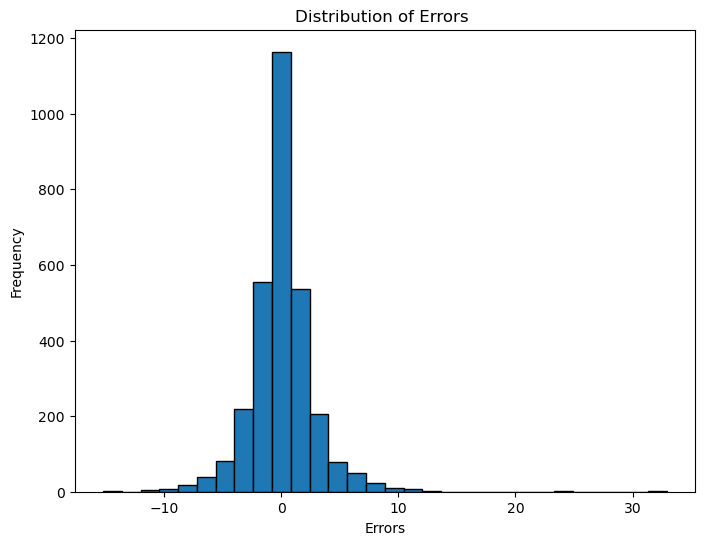

In [69]:
errors = y_test - p

# Creating a histogram to visualize the distribution of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors ')
plt.show()


In [70]:
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression()
lrModel.fit(x_train,y_train)

LinearRegression()

In [71]:
p2=lrModel.predict(x_test)
p2

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

In [72]:
y_test

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

In [73]:
lrModel.score(x_train,y_train)

0.9672762198112508

In [74]:
lrModel.score(x_test,y_test)

0.9668790377181355

In [75]:
lrModel.coef_

array([  0.4971492 ,  -0.19413313,   0.31333848,   6.64043789,
         1.98718175, -17.09094547,   1.4198873 ])

In [76]:
lrModel.intercept_

469.089511093263

In [77]:
lrModel.predict([[80,160.0,75.0,20.0,65.0,37.0,1]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([132.33100875])

In [78]:
lrModel.predict([[21,181.0,76.0,20.0,100.0,37.6,0]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([157.11265551])

In [79]:
mae = metrics.mean_absolute_error(y_test, p)
print("Mean Absolute Error = ", mae)


Mean Absolute Error =  1.7864363516569137


In [80]:
mse=mean_squared_error(y_test, p)
print("mean square error= ", mse)

mean square error=  7.244416724302815


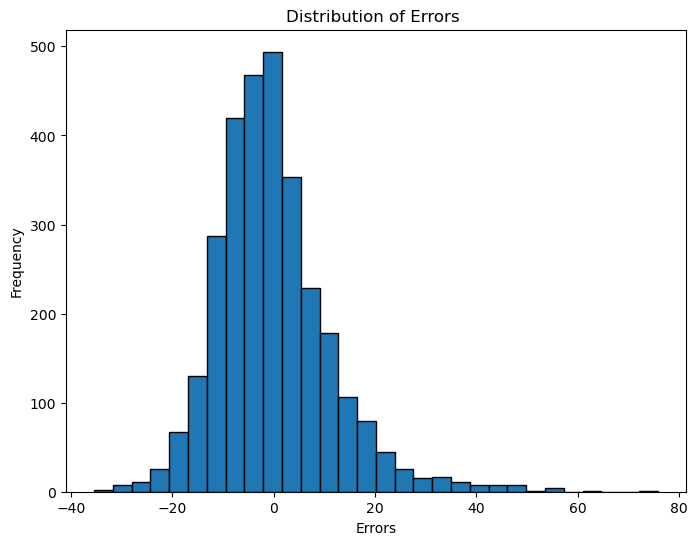

In [81]:
errors = y_test - p2

# Creating a histogram to visualize the distribution of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Errors ')
plt.show()


In [82]:
import pickle

In [83]:
#write binary
with open('excersice_df','wb') as file:
  pickle.dump(model,file)

In [ ]:
window=tk.Tk()
window.title=("Calories Burned prdiction")
window.geometry("500x700")

def get_values():
    try:
       
        age = float(age_entry.get()) 
        height = float(height_entry.get()) 
        weight = float(weight_entry.get()) 
        duration = float(duration_entry.get())
        heartrate = float(heartrate_entry.get())
        bodytemp = float(bodytemp_entry.get())
        gender = gender_entry.get() 

 
        gender_numeric = 0
        if gender.lower() == 'female':
            gender_numeric = 1

       
        prediction_result = model.predict([[age, height, weight, duration, heartrate, bodytemp, gender_numeric]])

     
        result_label.config(text=f"Predicted Calories Burned: {prediction_result[0]}")
        result_label.grid(row=8, column=0, columnspan=2)
    except ValueError:
        result_label.config(text="Invalid input. Please enter valid numerical values.")
        result_label.grid(row=8, column=0, columnspan=2)


labels = [
    "Enter Your Age:", "Enter Your Height:", "Enter Your Weight:",
    "Enter Your Duration:", "Enter Your Heart Rate:", "Enter Your Body Temperature:",
    "Enter Your Gender (e.g., Male/Female):"
]

entry_boxes = []
for i, label_text in enumerate(labels):
    label = tk.Label(window, text=label_text)
    label.grid(row=i, column=0, padx=5, pady=10)
    entry = tk.Entry(window)
    entry.grid(row=i, column=1)
    entry_boxes.append(entry)

submit_button = tk.Button(window, text="Predict", command=get_values)
submit_button.grid(row=len(labels), column=1, pady=10)

result_label = tk.Label(window, text="", fg="blue")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2)

age_entry, height_entry, weight_entry, duration_entry, heartrate_entry, bodytemp_entry, gender_entry = entry_boxes

window.mainloop()